## Libralies

In [8]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

sys.path.append('./modules/DataGraph')
from data_graph import DataGraph
sys.path.append('./modules/EvalGraph')
from eval_graph import EvalGraph

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
\begin{split}
\mu_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, & \quad \Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}, \\
\mu_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, & \quad \Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}.
\end{split}
\end{equation}


## (1) Plot

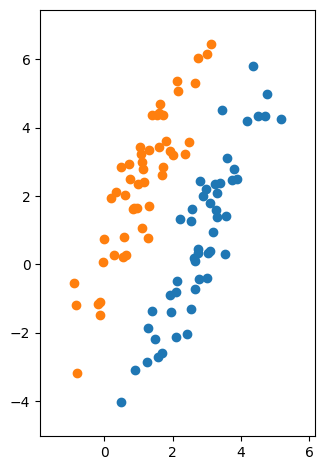

In [9]:
N=100
X = np.vstack( [
                multivariate_normal([3, 1], [[1, 2], [2, 5]], size=N//2),
                multivariate_normal([1, 2], [[1, 2], [2, 5]], size=N//2)
               ])
Y = np.hstack( [np.zeros(N//2), np.ones(N//2)])

dgraph = DataGraph()
dgraph.scatter(X[:N//2, 0], X[:N//2, 1])
dgraph.scatter(X[N//2:, 0], X[N//2:, 1])
dgraph.show()

## (3) LDA

#### Problem
We have $p$ dimensional data ${\bf x}_i \in {\mathbb R}^2$ and each sample belongs to known class $C_1, C_2$. We want to find a good line to separate the two classes.

In order to find the boundary, consider we perform the linear transformation with matrix ${\bf w \in {\mathbb R}^p}$ like PCA:

$$
{\bf y} = {\bf X}{\bf w}
$$

, where ${\bf X} = {[{\bf x}_1, {\bf x}_2, ..., {\bf x}_n]}^T \in {\mathbb R}^{n \times p}$, ${\bf y} = {[y_1, y_2, ..., y_n]}^T \in {\mathbb R}^{n}$. We want to minimize <span style="color: red; ">**the total within-class scatter**</span> and maxmize <span style="color: red; ">**the total between-class scatter**</span> of the projected dataset ${\bf y}$.

What are these scatters? Before answering that, we introduce the averages:

$$
\begin{align}
{\bf \mu} &= \frac{1}{n} \sum_{{\bf x} \in C_1 \cup C_2} {\bf x} \nonumber \\
{\tilde \mu} &= \frac{1}{n} \sum_{{\bf y} \in {\tilde C}_1 \cup {\tilde C}_2} {\bf y} \nonumber \\
{\bf \mu}_i &= \frac{1}{n_i} \sum_{{\bf x} \in C_i} {\bf x} \nonumber \\
{\tilde \mu}_i &= \frac{1}{n_i} \sum_{y \in {\tilde C}_i} y = \frac{1}{n_i} \sum_{{\bf x} \in C_i} {\bf w}^T {\bf x} = {\bf w}^T {\bf \mu}_i \nonumber \\
\end{align}
$$

##### <span style="color: red; ">**The total within-class scatter**</span>
We define the within class scatters $S_i$ and ${\tilde S}_i$:

$$
\begin{align}
S_i &= \sum_{{\bf x} \in C_i} {||{\bf x} - {\bf \mu}_i||}^2 \nonumber \\
 &= \sum_{{\bf x} \in C_i} ({\bf x} - {\bf \mu}_i) {({\bf x} - {\bf \mu}_i)}^T \nonumber \\
{\tilde S}_i &= \sum_{y \in {\tilde C}_i} {(y - {\tilde \mu}_i)}^2 \nonumber \\
 &= \sum_{{\bf x} \in C_i} {({\bf w}^T {\bf x} - {\bf w}^T {\bf \mu}_i)}^2 \nonumber \\
 &= \sum_{{\bf x} \in C_i} ({\bf w}^T ({\bf x} - {\bf \mu}_i)) {({\bf w}^T ({\bf x} - {\bf \mu}_i))}^T \nonumber \\
 &= {\bf w}^T {(\sum_{{\bf x} \in C_i} ({\bf x} - {\bf \mu}_i) {({\bf x} - {\bf \mu}_i)}^T)} {\bf w} \nonumber \\
 &= {\bf w}^T S_i {\bf w} \nonumber \\
\end{align}
$$

Here $n_i$ is the size of class $C_i$, and ${\tilde C}_i$ is a set of $y$ such that $y = {\bf w}^T {\bf x}$ and ${\bf x} \in C_i$. The within-class scatter denotes the variance of data belonging to certain class. Now we can define <span style="color: red; ">**the total within-class scatter**</span> $S_W$ and ${\tilde S}_W$:

$$
\begin{align}
S_W &= S_1 + S_2 \nonumber \\
{\tilde S}_W &= {\tilde S}_1 + {\tilde S}_2 \nonumber \\
 &= {\bf w}^T (S_1 + S_2) {\bf w} \nonumber \\
 &= {\bf w}^T S_W {\bf w} \nonumber \\
\end{align} 
$$

##### <span style="color: red; ">**The total between-class scatter**</span>
How about the total between-class scatter? We can simply represent as follows:

$$
\begin{align}
S_B &= \sum_{i=1,2} n_i ({{\bf \mu}_i - {\bf \mu}}) {({{\bf \mu}_i - {\bf \mu}})}^T \nonumber \\
 &= \frac{n_1 n_2}{n_1 + n_2} ({{\bf \mu}_1 - {\bf \mu}_2}) {({{\bf \mu}_1 - {\bf \mu}_2})}^T \quad(\because {\bf \mu} = \frac{n_1 {\bf \mu}_1 + n_2 {\bf \mu}_2}{n_1 + n_2}) \nonumber \\

{\tilde S}_B &= \sum_{i=1,2} n_i {({\tilde \mu}_i - {\tilde \mu})}^2 \nonumber \\
 &= \frac{n_1 n_2}{n_1 + n_2} {({\tilde \mu}_1 - {\tilde \mu}_2)}^2 \nonumber \\
 &= \frac{n_1 n_2}{n_1 + n_2} {({\bf w}^T ({\bf \mu}_1 - {\bf \mu}_2))}^2 \nonumber \\
 &= \frac{n_1 n_2}{n_1 + n_2} ({\bf w}^T ({\bf \mu}_1 - {\bf \mu}_2)) {({\bf w}^T ({\bf \mu}_1 - {\bf \mu}_2))}^T \nonumber \\
 &= \frac{n_1 n_2}{n_1 + n_2} {\bf w}^T ({\bf \mu}_1 - {\bf \mu}_2) {({\bf \mu}_1 - {\bf \mu}_2)}^T {\bf w} \nonumber \\
 &= {\bf w}^T S_B {\bf w} \nonumber \\
\end{align}
$$

##### <span style="color: red; ">**Fisher's criterion**</span>

What we want to do is to minimize the total within-class scatter ${\tilde S}_W$ and maxmize the total between-class scatter ${\tilde S}_B$. Considering that we define the following objective function, namely **Fisher's criterion** (or **Rayleigh Quotient**):

$$
J({\bf w}) = \frac{{\tilde S}_B}{{\tilde S}_W} = \frac{{\bf w}^T S_B {\bf w}}{{\bf w}^T S_W {\bf w}}
$$

In conclusion, what we have to solve is:

$$
\underset{{\bf w}}{{\rm argmax}} (J({\bf w}))\quad {\rm subject \hspace{1mm} to}\hspace{1mm}{\bf w}^T S_W {\bf w} = {\bf I}
$$

Here, by imposing a constraint condition ${\bf w}^T S_W {\bf w} = {\bf I}$ , we eliminate a degree of freedom for constant scaling stemming from a quadratic form of ${\bf w}$ in both the numerator and denominator.

#### Solution

<span style="color: red; ">**The method of Lagrange multiplier**</span>. Thanks to the constraint condition ${\bf w}^T S_W {\bf w} = {\bf I}$, we can say $J({\bf w}) = {\bf w}^T S_B {\bf w}$

$$
J({\bf w}) = \frac{{\tilde S}_B}{{\tilde S}_W} = \frac{{\bf w}^T S_B {\bf w}}{{\bf w}^T S_W {\bf w}}
$$

and form the Lagragian function ${\mathcal L}$:

$$
{\mathcal L}({\bf w}, \lambda) = {\bf w}^T S_B {\bf w} - \lambda ({\bf w}^T S_W {\bf w} - {\bf I})
$$

$$
\left\{
    \begin{align}
         \frac{\partial {\mathcal L}}{\partial {\bf w}} &= 2 S_B {\bf w} - 2 \lambda S_W {\bf w} = 0 \nonumber \\
         \frac{\partial {\mathcal L}}{\partial \lambda} &= {\bf w}^T S_W {\bf w} - {\bf I} = 0 \nonumber
    \end{align}
\right.
$$

Thus, ${\bf w}$ which maximizes $J({\bf w})$ is given by the following <span style="color: red; ">**generalized eigenvalue problem**</span>:

$$
S_B {\bf w} = \lambda S_w {\bf w}
$$

If $S_w$ is invertible, we can multiply both sides on the left by $S_w^{-1}$ and reduce the problem to regular one:

$$
S_w^{-1} S_B {\bf w} = \lambda {\bf w}
$$

Here, the following equation shows $S_B {\bf w}$ is propotional to the difference of the average vectors ${\bf \mu}_1, {\bf \mu}_2$:

$$
S_B {\bf w} \propto ({{\bf \mu}_1 - {\bf \mu}_2}) {({{\bf \mu}_1 - {\bf \mu}_2})}^T {\bf w} \propto {{\bf \mu}_1 - {\bf \mu}_2}
$$

because ${({{\bf \mu}_1 - {\bf \mu}_2})}^T {\bf w}$ becomes a scaler.

Therefore, the optimal value of ${\bf w}$ is:

$$
{\bf w} \propto S_w^{-1} S_B {\bf w} \propto S_w^{-1} ({{\bf \mu}_1 - {\bf \mu}_2})
$$

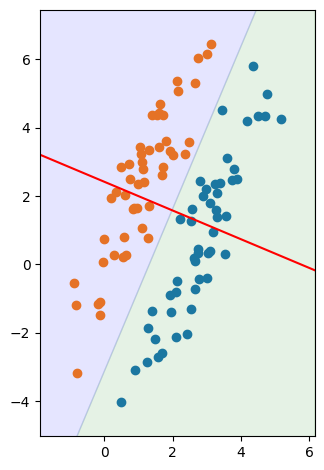

slope:
	axis : -0.42047421630904036 (-22.80549820945518 [deg])
	dicision boundary : 2.378267111781759 (67.19450179054482 [deg])


In [10]:
mu = np.mean(X, axis=0)
mu_1 = np.mean(X[:N//2,], axis=0)
mu_2 = np.mean(X[N//2:,], axis=0)

Sw = np.cov(X[:N//2, ], rowvar=0, bias=1) + np.cov(X[N//2:, ], rowvar=0, bias=1)

w_lda = np.linalg.inv(Sw) @ (mu_1 - mu_2)

dgraph = DataGraph()
dgraph.scatter(X[:N//2, 0], X[:N//2, 1])
dgraph.scatter(X[N//2:, 0], X[N//2:, 1])

slope_axis = w_lda[1] / w_lda[0]
_, _ = dgraph.draw_line(slope_axis, biases=mu, color='red')

slope_bound = -w_lda[0] / w_lda[1]
_, _ = dgraph.divide_into_2_regions(slope_bound, biases=mu)

dgraph.show()

print('slope:')
print(f'\taxis : {(slope_axis)} ({np.degrees(np.arctan(slope_axis))} [deg])')
print(f'\tdicision boundary : {(slope_bound)} ({np.degrees(np.arctan(slope_bound))} [deg])')

#### Problem

Compute the criterion at each axis which has angle $\theta$ given in radians in the range 0 to $\pi$ 

The criterion $J({\bf w})$ is given by the following equation:

$$
J({\bf w}) = \frac{{\tilde S}_B}{{\tilde S}_W} = \frac{{\bf w}^T S_B {\bf w}}{{\bf w}^T S_W {\bf w}}
$$

${\bf w}$ depends on $\theta$, so we should compute ${\bf w}$ to align the angle. We also take care to consider the constraints: ${\bf w}^T S_W {\bf w} = {\bf I}$

#### Solution

We can simply define ${\bf w}$ as follows:

$$
w_1 = {\rm cos} \varphi ,\quad w_2 = {\rm sin} \varphi
$$

We do not care about its scale, for $J({\bf w})$ has ${\bf w}$ on the both side.

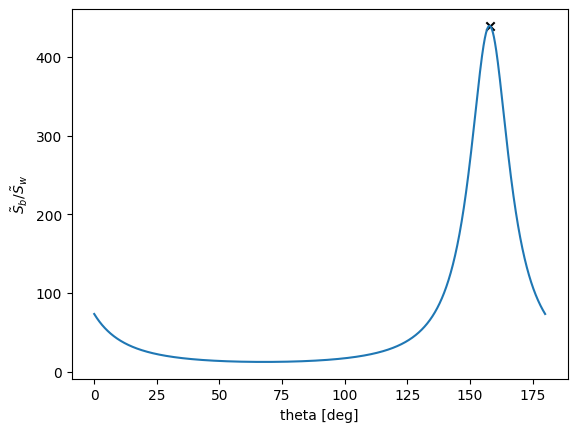

theta = 2.7542132190554494 (157.80479333101772 [deg])
max J = 439.693185720696
slope = -0.40799485213039


In [11]:
# Implement by yourself
n_1 = N//2
n_2 = N//2

Sb = n_1 * n_2 / (n_1 + n_2) * (mu_1 - mu_2) @ (mu_1 - mu_2).T

def target(theta_deg, Sb, Sw):
    theta_rad = np.radians(theta_deg)

    w_1 = np.cos(theta_rad)
    w_2 = np.sin(theta_rad)
    w = np.array([w_1, w_2]).T

    J = (w.T * Sb @ w) / (w.T @ Sw @ w)

    return J

egraph = EvalGraph()
theta_deg, J = egraph.draw_curve(function=target, start=0, stop=180, Sb=Sb, Sw=Sw)
egraph.xlabel('theta [deg]')
egraph.ylabel(r'$\tilde{S}_b / \tilde{S}_w$')

plt.show()

theta_rad = np.radians(theta_deg)
print(f'theta = {np.radians(theta_deg)} ({theta_deg} [deg])')
print(f'max J = {J}')
print(f'slope = {(np.tan(theta_rad))}')